In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_label0 = np.random.normal(-6,2,1000)
x_label1 = np.random.normal(6,2,1000)

xs = np.append(x_label0,x_label1)
ys = np.asarray([0.] * len(x_label0) + [1.] * len(x_label1))

In [4]:
def sigmoid(x):
    return  1.0 / (1.0 + np.exp(-x))


In [5]:
learning_rate = 0.01
training_epoch = 1000

train_loss = np.zeros(training_epoch)

In [6]:
X = tf.placeholder(tf.float32, shape=(None,), name='x')
Y = tf.placeholder(tf.float32, shape=(None,), name='y')

# Added w[0] as bias
def model(X, w):
    return tf.sigmoid(tf.add(tf.multiply(X,w[1]),w[0]))

w = tf.Variable([0.0,0.0], name="weights", trainable=True)

print(w)
y_model = model(X,w)
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1-Y)*tf.log(1-y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

<tf.Variable 'weights:0' shape=(2,) dtype=float32_ref>


In [7]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epoch):
    prev_err = 0
    _, train_loss[epoch] = sess.run([train_op, cost], feed_dict={X: xs, Y: ys})
    if abs(prev_err - train_loss[epoch]) < 0.0001:
        break
    prev_err = train_loss[epoch]
w_val = sess.run(w,feed_dict={X: xs, Y: ys})

correct_prediction = tf.equal(Y,tf.to_float(tf.greater(y_model,0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))
print('accuracy', sess.run(accuracy, feed_dict={X:xs, Y:ys}))

sess.close()

accuracy 0.999


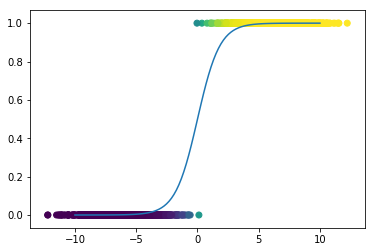

In [8]:
all_xs = np.linspace(-10,10,100)
with tf.Session() as sess:
    predicted = sess.run(tf.sigmoid(all_xs * w_val[1] + w_val[0]))
    
plt.plot(all_xs,predicted)
plt.scatter(xs,ys,c=sigmoid(xs*w_val[1] + w_val[0]))
plt.show()